## Bike Sharing Assignment - Shyam Rajagopal

# Background

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


# The Problem

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demand
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


## The Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Python Libraries

In [1]:
#Numpy and Pandas
import pandas as pd
import numpy as np
from math import sqrt

#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Reading & Analyzing Data

In [3]:
#Read the Dataset

bikes = pd.read_csv("C:\\Users\shaya\OneDrive\Desktop\Bike Assignment\dataset and questions\day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking for Missing Values

<AxesSubplot:>

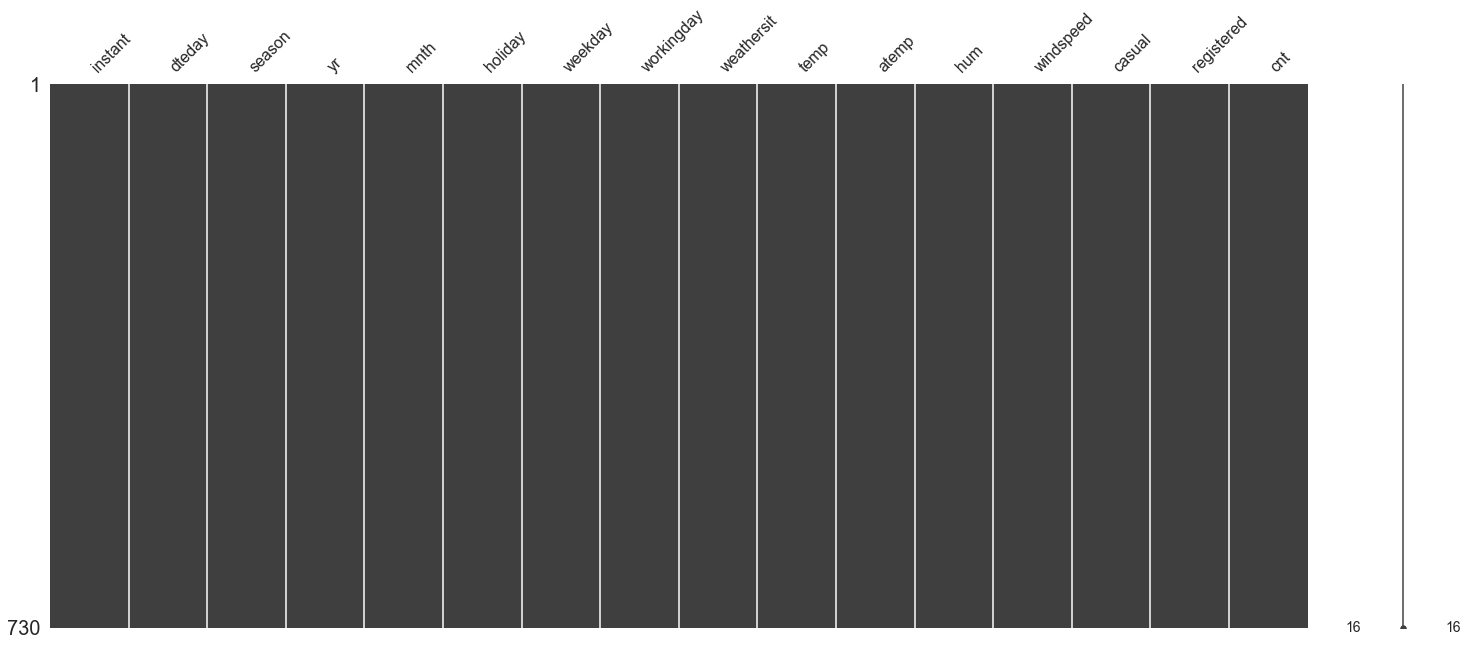

In [7]:
import missingno as mn
mn.matrix(bikes)

### No missing values found in the dataset

In [8]:
bikes['dteday'].dtype

dtype('O')

### Conversion of the datatype of dteday column to datetime

In [9]:
bikes['dteday'] =  pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes['dteday'].dtype

dtype('<M8[ns]')

#### Extraction of year and month from the date

In [10]:
bikes['year'] = pd.DatetimeIndex(bikes['dteday']).year
bikes['month'] = pd.DatetimeIndex(bikes['dteday']).month

In [11]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [12]:
#Dropping 'yr' and 'mnth' because we extracted proper year and month fields

bikes.drop(['yr', 'mnth'], axis=1,inplace=True)

In [13]:
bikes.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [14]:
#Dropping instant, casual, dteday and registered columns
bikes.drop(['dteday', 'instant', 'casual', 'registered'], axis=1, inplace = True)

In [15]:
#Dropping holiday variable as we have workingday column with enough information hence making the holiday column redundant
bikes.drop('holiday', axis=1, inplace = True)

In [16]:
bikes.rename(columns = {'cnt': 'count', 'hum': 'humidity'}, inplace = True)
bikes.head()


,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [17]:
bikes.shape

(730, 11)

## Data Visualization

### Encoding Categorical Columns
Converting season, weathersit, workingday, year, month, weekday, temp, atemp, humidity and windspeed   to categorical columns

#### Season  
1) spring 
2) summer 
3) fall 
4) winter

In [18]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikes['season'] = bikes['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='count'>

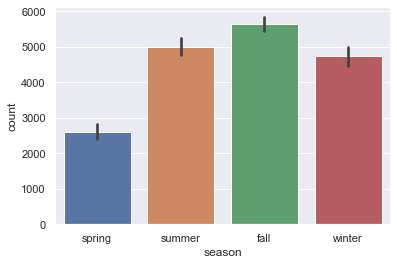

In [19]:
sns.barplot('season', 'count', data = bikes)

#### WeekDay
Mon, Tue, Wed, Thu, Fri, Sat, Sun


In [20]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

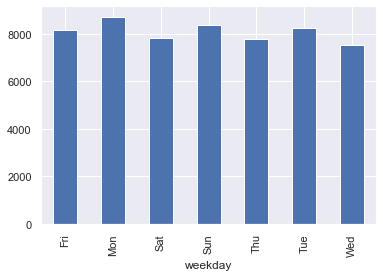

In [21]:
bikes.groupby('weekday')['count'].max().plot(kind='bar')

#### Bike rentals are maximum on Mondays and Sundays

#### Workingday

If the day is neither holiday or weekend: 1
Otherwise: 0

In [22]:
codes = {1: 'working_day', 0: 'Holiday'}
bikes['workingday'] = bikes['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='count'>

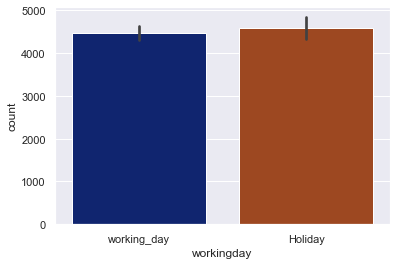

In [23]:
sns.barplot('workingday', 'count', data = bikes, palette = 'dark')

#### Bikes seem to be rented more on Holidays

#### Month

1:Jan
2:Feb
3:Mar
4:Apr
5:May
6:June
7:July
8:Aug
9:Sep
10:Oct
11:Nov
12:Dec

In [24]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikes['month'] = bikes['month'].map(codes)

<AxesSubplot:xlabel='month', ylabel='count'>

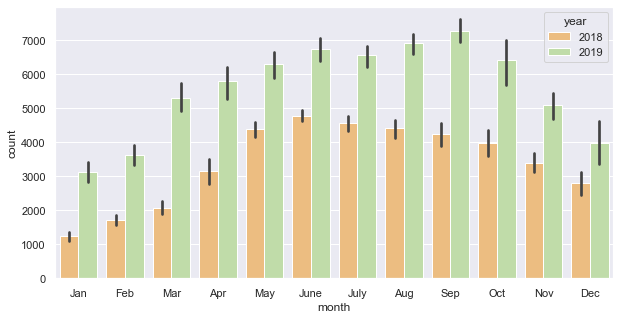

In [25]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bikes,palette='Spectral')

#### September seems to be the highest month in 2019 where bikes were rented

#### Year

2018:0
2019:1

In [26]:
codes = {2019:1,2018:0}
bikes['year'] = bikes['year'].map(codes)

<AxesSubplot:xlabel='year', ylabel='count'>

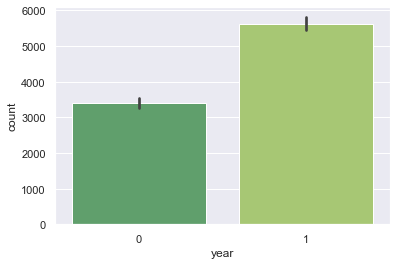

In [27]:
sns.barplot('year','count',data=bikes,palette='summer')

#### Bike rentals have more increased popularity in 2019 compared to 2018

#### Weathersit

1: Clear, Few clouds, Partly cloudy, Partly cloudy 


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [28]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikes['weathersit'] = bikes['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

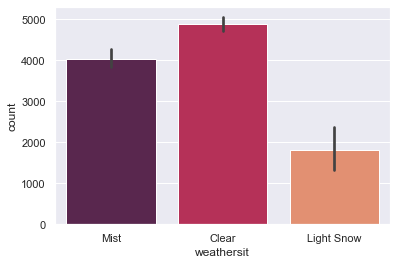

In [29]:
sns.barplot('weathersit','count',data=bikes, palette = 'rocket')

#### Bikes seem to be rented more in Partly cloudy weather.

#### Temp

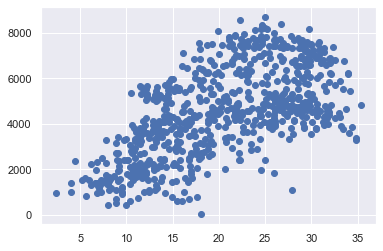

In [30]:
plt.scatter('temp','count',data=bikes)

#### Bike rentals seems to take place during higher temperatures

#### atemp

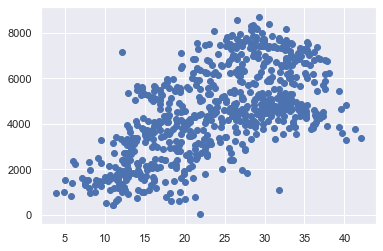

In [31]:
plt.scatter('atemp','count',data=bikes)

#### Humidity

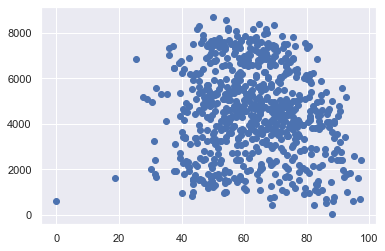

In [32]:
plt.scatter('humidity','count',data=bikes)

It seems that the Temperature is directly proportional to Humidity, as Bike Rentals are occuring during high humidity.

#### Windspeed

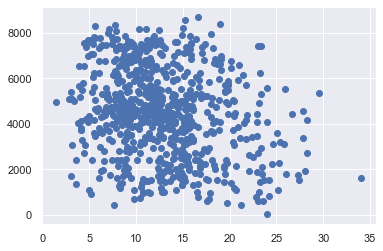

In [33]:
plt.scatter('windspeed','count',data=bikes)

Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature.

<AxesSubplot:xlabel='count', ylabel='Density'>

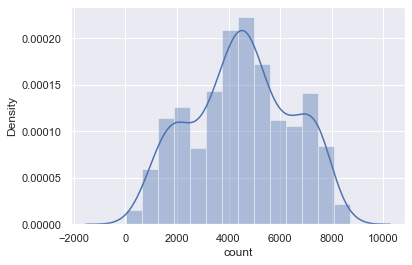

In [34]:
sns.distplot(bikes['count'])

### Visualizing the Relationship b/w variables

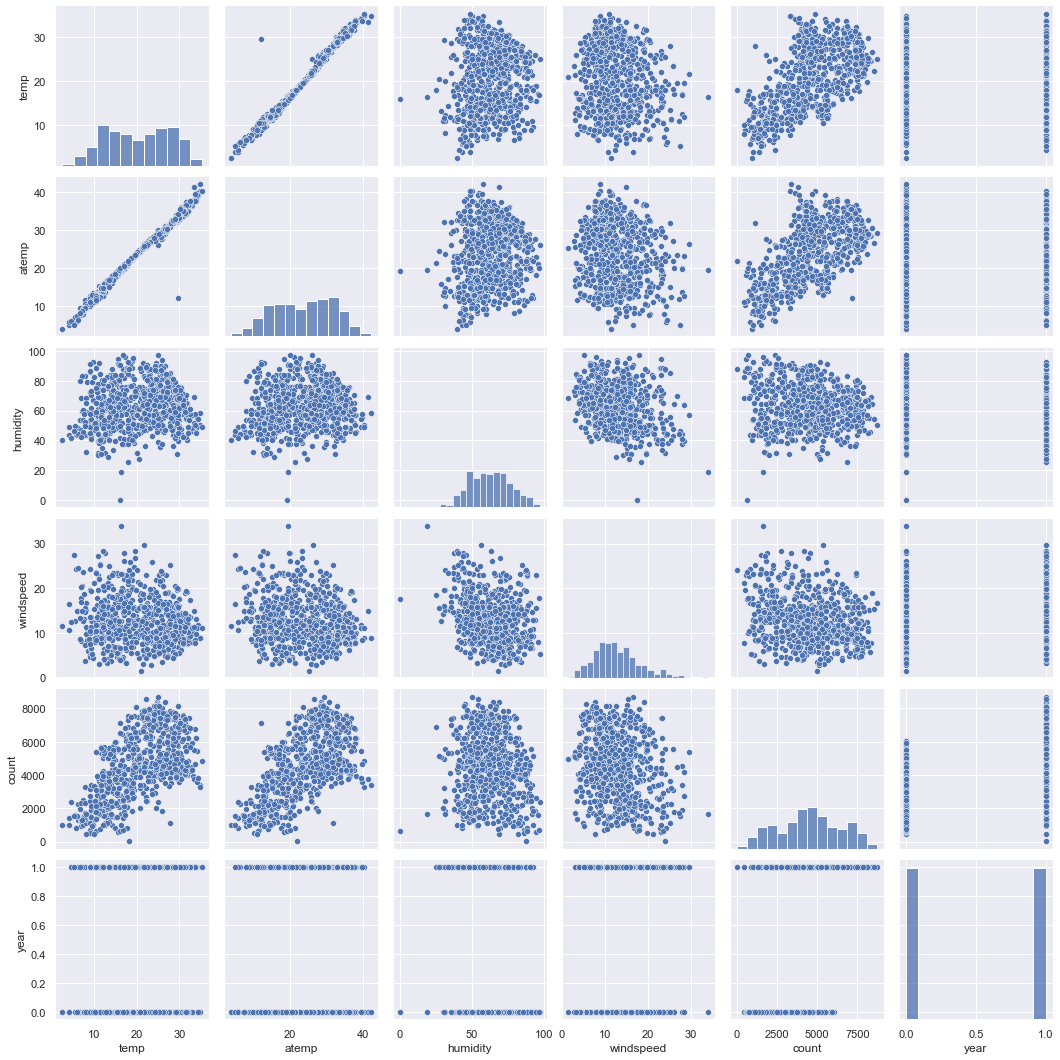

In [35]:
sns.pairplot(bikes)

<AxesSubplot:>

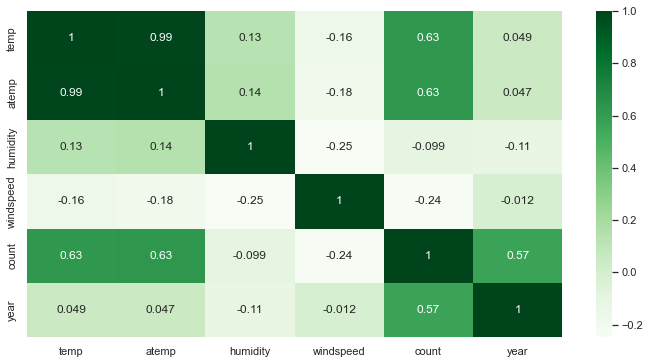

In [36]:
plt.figure(figsize = (12,6))
sns.heatmap(bikes.corr(),annot=True, cmap = "Greens")

<AxesSubplot:>

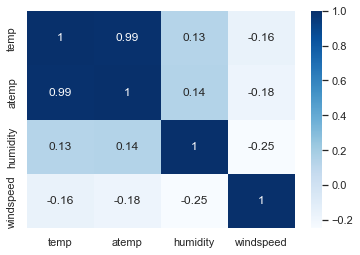

In [37]:
data= bikes[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True, cmap = "Blues")

#### atemp and temp are highly correlated and one of them can be dropped inorder to prevent multicollinearity

In [38]:
#Dropping atemp
bikes.drop('atemp',axis=1,inplace=True)

In [39]:
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


In [40]:
bikes.shape

(730, 10)

### Managing Categorical Variables

In [41]:
seasons = pd.get_dummies(bikes['season'],drop_first=True)

working_day = pd.get_dummies(bikes['workingday'],drop_first=True)

weather= pd.get_dummies(bikes['weathersit'],drop_first=True)

month= pd.get_dummies(bikes['month'],drop_first=True)

week_day= pd.get_dummies(bikes['weekday'],drop_first=True)

In [42]:
bikes = pd.concat([bikes,seasons,working_day,weather,month,week_day],axis=1)

In [43]:
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [44]:
# Dropping the categorical variables as they are already dummy-encoded.

bikes.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [45]:
bikes.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Splitting data into Testing sets and Training sets

In [46]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the features

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [48]:
# Applying scaler() to all the columns except to the dummy variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

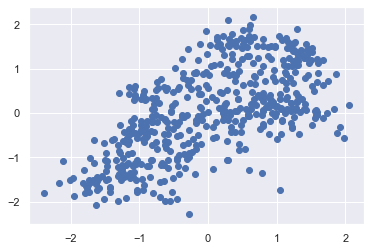

In [49]:
plt.scatter('temp','count',data=df_train)

### For model building we divide sets into X and Y sets

In [50]:
y_train = df_train.pop('count')
X_train = df_train

## Building a linear model

Implementing RFE

In [51]:
#Importing RFE and Linear Regression Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,10) #running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [54]:
column = X_train.columns[rfe.support_]
column

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
rfe_X_train = X_train[column]

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
rfe_X_train = sm.add_constant(rfe_X_train)

In [57]:
lr = sm.OLS(y_train,rfe_X_train).fit()   # Running the linear model

In [58]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.16e-176
Time:                        10:26:17   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping mon as it is insignificant

In [59]:
X_train_1= rfe_X_train.drop('Mon',1)

In [60]:
X_train_2= sm.add_constant(X_train_1)
lr1 = sm.OLS(y_train,X_train_2).fit() 

In [61]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.73e-175
Time:                        10:26:17   Log-Likelihood:                -297.49
No. Observations:                 510   AIC:                             615.0
Df Residuals:                     500   BIC:                             657.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1902      0.059     -3.212      0.001      -0.307      -0.074
temp            0.4042      0.028     14.673      0.000       0.350       0.458
year            1.0463      0.039     26.730      0.000       0.969       1.123
spring         -0.6842      0.058    -11.865      0.000      -0.797      -0.571
working_day    -0.0278      0.054     -0.514      0.607      -0.134       0.078
Light Snow     -1.2901      0.117    -11.047      0.000      -1.519      -1.061
Mist           -0.3544      0.042     -8.490      0.000      -0.436      -0.272
July           -0.3052      0.083     -3.698      0.000      -0.467      -0.143
Sep             0.2731      0.075      3.662      0.000       0.127       0.420
Sun             0.0459      0.073      0.630      0.529      -0.097       0.189
==============================================================================
Omnibus:                       60.871   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.020
Skew:                          -0.641   Prob(JB):                     3.94e-31
Kurtosis:                       5.224   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
lr1.params

const         -0.190248
temp           0.404187
year           1.046349
spring        -0.684157
working_day   -0.027815
Light Snow    -1.290063
Mist          -0.354381
July          -0.305184
Sep            0.273107
Sun            0.045863
dtype: float64

In [63]:
X_train_new= X_train_2.drop('const',axis=1)

### Variance Inflation Factor(VIF)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.14
0,temp,2.01
2,spring,2.00
1,year,1.81
5,Mist,1.44
6,July,1.35
8,Sun,1.24
7,Sep,1.16
4,Light Snow,1.06


### All the variables have VIF less than 5

## Residual Analysis of the train data

In [65]:
y_train_pred = lr1.predict(X_train_2)

Text(0.5, 0, 'Errors')

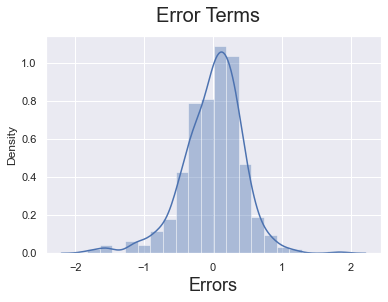

In [66]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### Creating predictions

In [67]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [68]:
test_y = df_test.pop('count')
test_X = df_test

In [69]:
#Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
new_test_X = test_X[X_train_new.columns]

# Adding a constant variable 
new_test_X = sm.add_constant(new_test_X)

In [70]:
# Making predictions
y_test_pred = lr1.predict(new_test_X)

### Model Evaluation

Text(0, 0.5, 'Predictions')

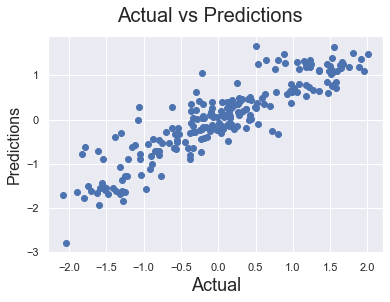

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(test_y,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [72]:
from sklearn.metrics import r2_score
r2_score(test_y, y_test_pred)

0.8035305530955212

## Assumptions of Linear Regression

* The predicted values have linear relationship with the actual values.
* The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
* The error terms are normally distributed.

### Conclusion:
The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

Temperature :0.4042
Year: 1.0463
Sep. : 0.273107
Sun. : 0.045863
Working_day: -0.0278
